# PRUEBA FINAL - R Y PYTHON

# 1. PRIMERA PREGUNTA

1. Primero importamos librerías que nos servirán para el desarrollo 

In [9]:
!pip install linearmodels
!pip install pystout


import pandas as pd 
import numpy as np
import re 
from tqdm import tqdm  # controlar el tiempo en un loop
import os

#plots library
import matplotlib.pyplot as plt
import seaborn as sns

# linear model library

import statsmodels.api as sm  # linear regression utiliza todas las columnas de base de datos 
import statsmodels.formula.api as smf  # linear regression usa uan formula
import patsy
from sklearn import datasets, linear_model # models 
from sklearn.metrics import mean_squared_error, r2_score
from linearmodels.iv import IV2SLS # for IV regression

import warnings
warnings.filterwarnings('ignore') # eliminar warning messages 


# Export latex table 

from pystout import pystout

#### Realizar las estad´ısticas descriptivas (mean, sd, min, max, Observations) de las variables American student, In-state student, Freshman, Cumulative GPA, Belongs to soroty, Took econ in high school, Athlete. Exportar la tabla en LaTeX.

2. Cargamos le dataset

In [10]:
repdata = pd.read_stata(r"../../data/trabajo_final/replicacion/SerraPorterAEJ.dta",
                           convert_categoricals=False)

# convert_categoricals=False: No se lee las etiquetas de valor 

repdata

,anonid,took_fall,took_year,tookanother,numeconclass,econmajor,Major,Major_STEM,Major_Business,Major_Finance,...,ecojobs_b,ecojobs_c,ecojobs_d,ecojobs_e,ecojobs_f,ecojobs_g,ecojobs_h,major_current_a,major_current_b,survey_econmajor
0,4.0,0.0,0.0,0.0,0.0,0.0,Mathematics - BS,1.0,0.0,0.0,...,Entrepreneur,Journalist/ Correspondent,Working for marketplace on NPR,Business consultant,,,,Mathematics,,0.0
1,5.0,0.0,0.0,0.0,0.0,0.0,Biological Sciences - BS,1.0,0.0,0.0,...,Tax advisor,Managerial Position,,,,,,Biology,,0.0
2,7.0,1.0,1.0,1.0,13.0,1.0,Economics w/ Fina Appl - BS,0.0,0.0,0.0,...,,,,,,,,,,NaN
3,9.0,0.0,0.0,0.0,0.0,0.0,Journalism - BA,0.0,0.0,0.0,...,,,,,,,,Journalism,Communications,0.0
4,10.0,0.0,0.0,1.0,1.0,0.0,Markets & Culture - BA,0.0,0.0,0.0,...,Investment Banker,,,,,,,Markets and Culture,Economics,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622,1386.0,0.0,0.0,0.0,0.0,0.0,Markets & Culture - BA,0.0,0.0,0.0,...,,,,,,,,,,NaN
623,1388.0,0.0,0.0,0.0,0.0,0.0,Economics w/ Fina Appl - PMJ,0.0,0.0,0.0,...,,,,,,,,Business,,0.0
624,1389.0,0.0,0.0,0.0,0.0,0.0,Accounting - BBA,0.0,1.0,0.0,...,Finance,Bank,Government,,,,,Economics,Public Relations,1.0
625,1393.0,0.0,1.0,1.0,10.0,1.0,Economics - BA,0.0,0.0,0.0,...,Professor,Economist,,,,,,Entrepreneurship,Finance Economics,0.0


3. Vemos la tabla1

In [11]:
table1 = repdata.loc[:,["american", "instate", "freshman","ACumGPA", "greek", "econ_hs",
                        "varsity"]]
table1

,american,instate,freshman,ACumGPA,greek,econ_hs,varsity
0,1.0,1.0,0.0,3.267,0.0,1.0,0.0
1,1.0,1.0,0.0,3.358,0.0,1.0,0.0
2,1.0,0.0,1.0,1.775,NaN,NaN,NaN
3,1.0,1.0,0.0,3.654,1.0,1.0,0.0
4,1.0,1.0,0.0,3.000,1.0,1.0,0.0
...,...,...,...,...,...,...,...
622,1.0,0.0,1.0,2.653,NaN,NaN,NaN
623,0.0,0.0,1.0,3.200,0.0,0.0,0.0
624,0.0,0.0,1.0,3.677,0.0,0.0,1.0
625,0.0,0.0,1.0,3.500,0.0,0.0,0.0


4. Ahora, vemos el summarytable

In [12]:
summary_table = table1.describe().loc[["mean","std","min","max","count"]].T
summary_table

,mean,std,min,max,count
american,0.902711,0.296587,0.0,1.0,627.0
instate,0.221691,0.415717,0.0,1.0,627.0
freshman,0.864434,0.342602,0.0,1.0,627.0
ACumGPA,3.432091,0.435175,1.2,4.0,627.0
greek,0.642715,0.479679,0.0,1.0,501.0
econ_hs,0.578842,0.494239,0.0,1.0,501.0
varsity,0.072000,0.258747,0.0,1.0,500.0


In [13]:
table1.columns

new_names = ["American student","In-state student","Freshman",
"Cumulative GPA","Belongs to sorority","Took econ in high school",  
"Athlete"]

# unión de listas bajo la estructura diccionario

dict( zip( table1.columns, new_names) )

{'american': 'American student',
 'instate': 'In-state student',
 'freshman': 'Freshman',
 'ACumGPA': 'Cumulative GPA',
 'greek': 'Belongs to sorority',
 'econ_hs': 'Took econ in high school',
 'varsity': 'Athlete'}

In [14]:
# Customize summary table 

index_nuevos_nombres = dict( zip( table1.columns, new_names) )

columns_nuevos_nombres = {
    "mean": "Mean",
    "std": "Standard Deviation",
    "min": "Minimum",
    "max": "Maximum",
    "count": "Observations",
}

# Rename rows (indexes) and columns
summary_table.rename(index=index_nuevos_nombres, columns=columns_nuevos_nombres, inplace=True)


5. Igualmente trabajamos con el summarytable

In [15]:
summary_table

,Mean,Standard Deviation,Minimum,Maximum,Observations
American student,0.902711,0.296587,0.0,1.0,627.0
In-state student,0.221691,0.415717,0.0,1.0,627.0
Freshman,0.864434,0.342602,0.0,1.0,627.0
Cumulative GPA,3.432091,0.435175,1.2,4.0,627.0
Belongs to sorority,0.642715,0.479679,0.0,1.0,501.0
Took econ in high school,0.578842,0.494239,0.0,1.0,501.0
Athlete,0.072000,0.258747,0.0,1.0,500.0


6. Exportamos a Latex

In [16]:
# Export the DataFrame to LaTeX
# \ permite esccribir código extenso en lineas diferentes

summary_table.style.format(subset="Mean", precision=2).format(subset="Standard Deviation", precision=2)\
.format(subset="Minimum", precision=1).format(subset="Maximum", precision=1)\
.format(subset="Observations", precision=0)\
.to_latex(
    r"..\..\output\tables\summary_py1.tex",
caption="Descriptive Statistics",
    column_format = "lccc"   # l: left, c:center , r: right
) 

### 2. Replicar tabla 3  </a> 

- Treatment Effects on Intermediate Outcomes

In [17]:
formula_model1 = "took_year ~ " + "yr_2016 + treatment_class + treat2016" 

ols_model1 = smf.ols(formula_model1, data=repdata).fit(cov_type='cluster', cov_kwds={'groups': repdata['class_fe2']})

print(ols_model1.summary())

                            OLS Regression Results                            
Dep. Variable:              took_year   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     16.50
Date:                Sat, 15 Jul 2023   Prob (F-statistic):           0.000220
Time:                        22:34:34   Log-Likelihood:                -211.88
No. Observations:                 627   AIC:                             431.8
Df Residuals:                     623   BIC:                             449.5
Df Model:                           3                                         
Covariance Type:              cluster                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.1474      0.014     

In [18]:
formula_model3 = "tookanother ~ " + "yr_2016 + treatment_class + treat2016" 

ols_model3 = smf.ols(formula_model3, data=repdata).fit(cov_type='cluster', cov_kwds={'groups': repdata['class_fe2']})

print(ols_model3.summary())

                            OLS Regression Results                            
Dep. Variable:            tookanother   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     10.04
Date:                Sat, 15 Jul 2023   Prob (F-statistic):            0.00176
Time:                        22:34:37   Log-Likelihood:                -330.66
No. Observations:                 627   AIC:                             669.3
Df Residuals:                     623   BIC:                             687.1
Df Model:                           3                                         
Covariance Type:              cluster                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.2372      0.018     

Vemos las variables de control

In [19]:

control_vars = ["female_prof", "instate", "freshman", "american", "ACumGPA", "gradePrinciples", "small_class"]


In [20]:
formula_model2 = "took_year ~ " + "yr_2016 + treatment_class + treat2016 + " + ' + '.join( control_vars )
ols_model2 = smf.ols(formula_model2, data=repdata).fit(cov_type='cluster', cov_kwds={'groups': repdata['class_fe2']})
print(ols_model2.summary())

                            OLS Regression Results                            
Dep. Variable:              took_year   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     12.67
Date:                Sat, 15 Jul 2023   Prob (F-statistic):           0.000114
Time:                        22:34:41   Log-Likelihood:                -203.16
No. Observations:                 627   AIC:                             428.3
Df Residuals:                     616   BIC:                             477.2
Df Model:                          10                                         
Covariance Type:              cluster                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.3720      0.099     

In [21]:
formula_model4 = "tookanother ~ " + "yr_2016 + treatment_class + treat2016 + " + ' + '.join( control_vars )
ols_model4 = smf.ols(formula_model4, data=repdata).fit(cov_type='cluster', cov_kwds={'groups': repdata['class_fe2']})
print(ols_model4.summary())

                            OLS Regression Results                            
Dep. Variable:            tookanother   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     6.235
Date:                Sat, 15 Jul 2023   Prob (F-statistic):            0.00281
Time:                        22:34:44   Log-Likelihood:                -318.16
No. Observations:                 627   AIC:                             658.3
Df Residuals:                     616   BIC:                             707.2
Df Model:                          10                                         
Covariance Type:              cluster                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.8032      0.176     

In [22]:
# Lista de explicativa a mostrarse en la tabla

explicativas = ['treat2016','yr_2016','treatment_class','Intercept']

# etiquetas a las variables 

etiquetas = ['Treatment class x 2016','Year 2016','Treatment class (in 2015)','Constant']


labels = dict(zip(explicativas,etiquetas))
labels 

{'treat2016': 'Treatment class x 2016',
 'yr_2016': 'Year 2016',
 'treatment_class': 'Treatment class (in 2015)',
 'Intercept': 'Constant'}

In [23]:
#exportamos a latex
pystout(models = [ols_model1,ols_model2,ols_model3,ols_model4], file=r"..\..\output\tables\regression_table_1p_py.tex", digits=3,
        endog_names=['(Took Micro within year)','(Took Micro within year)','(Took Another Econ class)','(Took Another Econ class)'],
        exogvars =explicativas ,  # sellecionamos las variables 
        varlabels = labels,  # etiquetas a las variables
        modstat={'nobs':'Observarions'}, # estadísticos 
        addrows={'Controls':['No','Yes','No','Yes']}, # añadimos filas 
        addnotes=['Note.LPM regression',
                  'Regression disturbance terms are clustered at the class level (12 clusters).',
                 '* Significantly different from zero at 90 percent confidence.',
                 '** Significantly different from zero at 95 percent confidence.',
                 '*** Significantly different from zero at 99 percent confidence.'],
        title='Treatment Effects on Intermediate Outcomes',
        stars={.1:'*',.05:'**',.01:'***'}
       )

### 3. Replicar tabla 4  </a> 

- Treatment effects on Final Outcomes

In [24]:
formula_model5 = "numeconclass ~ " + "yr_2016 + treatment_class + treat2016" 

ols2_model1 = smf.ols(formula_model5, data=repdata).fit(cov_type='cluster', cov_kwds={'groups': repdata['class_fe2']})

print(ols2_model1.summary())

                            OLS Regression Results                            
Dep. Variable:           numeconclass   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.964
Date:                Sat, 15 Jul 2023   Prob (F-statistic):             0.0385
Time:                        22:34:50   Log-Likelihood:                -1505.4
No. Observations:                 627   AIC:                             3019.
Df Residuals:                     623   BIC:                             3037.
Df Model:                           3                                         
Covariance Type:              cluster                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.0256      0.112     

In [25]:
formula_model7 = "econmajor ~ " + "yr_2016 + treatment_class + treat2016" 

ols2_model3 = smf.ols(formula_model7, data=repdata).fit(cov_type='cluster', cov_kwds={'groups': repdata['class_fe2']})

print(ols2_model3.summary())

                            OLS Regression Results                            
Dep. Variable:              econmajor   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     6.719
Date:                Sat, 15 Jul 2023   Prob (F-statistic):            0.00770
Time:                        22:34:52   Log-Likelihood:                -133.19
No. Observations:                 627   AIC:                             274.4
Df Residuals:                     623   BIC:                             292.1
Df Model:                           3                                         
Covariance Type:              cluster                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.1026      0.011     

In [26]:
#con variables de control
formula_model6 = "numeconclass ~ " + "yr_2016 + treatment_class + treat2016 + " + ' + '.join( control_vars )
ols2_model2 = smf.ols(formula_model6, data=repdata).fit(cov_type='cluster', cov_kwds={'groups': repdata['class_fe2']})
print(ols2_model2.summary())

                            OLS Regression Results                            
Dep. Variable:           numeconclass   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     30.57
Date:                Sat, 15 Jul 2023   Prob (F-statistic):           1.37e-06
Time:                        22:34:55   Log-Likelihood:                -1486.6
No. Observations:                 627   AIC:                             2995.
Df Residuals:                     616   BIC:                             3044.
Df Model:                          10                                         
Covariance Type:              cluster                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           5.8037      1.266     

In [27]:
formula_model8 = "econmajor ~ " + "yr_2016 + treatment_class + treat2016 + " + ' + '.join( control_vars )
ols2_model4 = smf.ols(formula_model8, data=repdata).fit(cov_type='cluster', cov_kwds={'groups': repdata['class_fe2']})
print(ols2_model4.summary())

                            OLS Regression Results                            
Dep. Variable:              econmajor   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     8.543
Date:                Sat, 15 Jul 2023   Prob (F-statistic):           0.000714
Time:                        22:34:59   Log-Likelihood:                -118.28
No. Observations:                 627   AIC:                             258.6
Df Residuals:                     616   BIC:                             307.4
Df Model:                          10                                         
Covariance Type:              cluster                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.5105      0.158     

In [28]:
#exportamos a latex
pystout(models = [ols2_model1,ols2_model2,ols2_model3,ols2_model4], file=r"..\..\output\tables\regression_table1_2p_py.tex", digits=3,
        endog_names=['Num Econ classes taken','Num Econ classes taken','Major in Economics','Major in Economics'],
        exogvars =explicativas ,  # sellecionamos las variables 
        varlabels = labels,  # etiquetas a las variables
        modstat={'nobs':'Observarions'}, # estadísticos 
        addrows={'Controls':['No','Yes','No','Yes']}, # añadimos filas 
        addnotes=['Note.Column (1-2) OLS regressions, column (3-4) LPM regressions.',
                  'Regression disturbance terms are clustered at the class level (12 clusters).',
                 '* Significantly different from zero at 90 percent confidence.',
                 '** Significantly different from zero at 95 percent confidence.',
                 '*** Significantly different from zero at 99 percent confidence.'],
        title='Treatment effects on Final Outcomes',
        stars={.1:'*',.05:'**',.01:'***'}
       )

### 4. Replicar tabla 5  </a> 

- Treatment effects on Other High-earning Majors

In [29]:
formula_model9 = "Major_STEM ~ " + "yr_2016 + treatment_class + treat2016 + " + ' + '.join( control_vars )

ols3_model1 = smf.ols(formula_model9, data=repdata).fit(cov_type='cluster', cov_kwds={'groups': repdata['class_fe2']})

print(ols3_model1.summary())

                            OLS Regression Results                            
Dep. Variable:             Major_STEM   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     6.932
Date:                Sat, 15 Jul 2023   Prob (F-statistic):            0.00179
Time:                        22:35:04   Log-Likelihood:                -159.54
No. Observations:                 627   AIC:                             341.1
Df Residuals:                     616   BIC:                             389.9
Df Model:                          10                                         
Covariance Type:              cluster                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.2453      0.142     

In [30]:
formula_model10 = "Major_Business ~ " + "yr_2016 + treatment_class + treat2016 + " + ' + '.join( control_vars )

ols3_model2 = smf.ols(formula_model10, data=repdata).fit(cov_type='cluster', cov_kwds={'groups': repdata['class_fe2']})

print(ols3_model2.summary())

                            OLS Regression Results                            
Dep. Variable:         Major_Business   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     78.36
Date:                Sat, 15 Jul 2023   Prob (F-statistic):           9.36e-09
Time:                        22:35:06   Log-Likelihood:                -319.96
No. Observations:                 627   AIC:                             661.9
Df Residuals:                     616   BIC:                             710.8
Df Model:                          10                                         
Covariance Type:              cluster                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.1535      0.214     

In [31]:
formula_model11 = "Major_Finance ~ " + "yr_2016 + treatment_class + treat2016 + " + ' + '.join( control_vars )

ols3_model3 = smf.ols(formula_model11, data=repdata).fit(cov_type='cluster', cov_kwds={'groups': repdata['class_fe2']})

print(ols3_model3.summary())

                            OLS Regression Results                            
Dep. Variable:          Major_Finance   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     61.41
Date:                Sat, 15 Jul 2023   Prob (F-statistic):           3.46e-08
Time:                        22:35:08   Log-Likelihood:                -224.50
No. Observations:                 627   AIC:                             471.0
Df Residuals:                     616   BIC:                             519.8
Df Model:                          10                                         
Covariance Type:              cluster                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.3188      0.149     

In [32]:
formula_model12 = "Major_Marketing ~ " + "yr_2016 + treatment_class + treat2016 + " + ' + '.join( control_vars )

ols3_model4 = smf.ols(formula_model12, data=repdata).fit(cov_type='cluster', cov_kwds={'groups': repdata['class_fe2']})

print(ols3_model4.summary())

                            OLS Regression Results                            
Dep. Variable:        Major_Marketing   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     305.1
Date:                Sat, 15 Jul 2023   Prob (F-statistic):           5.81e-12
Time:                        22:35:10   Log-Likelihood:                -199.30
No. Observations:                 627   AIC:                             420.6
Df Residuals:                     616   BIC:                             469.5
Df Model:                          10                                         
Covariance Type:              cluster                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.2548      0.093     

In [33]:
#exportamos a latex
pystout(models = [ols3_model1,ols3_model2,ols3_model3,ols3_model4], file=r"..\..\output\tables\regression_table1_3p_py.tex", digits=3,
        endog_names=['Major STEM','Major Finance','Major Business','Major Marketing'],
        exogvars =explicativas ,  # sellecionamos las variables 
        varlabels = labels,  # etiquetas a las variables
        modstat={'nobs':'Observarions'}, # estadísticos 
        addrows={'Controls':['Yes','Yes','Yes','Yes']}, # añadimos filas 
        addnotes=['Note.LPM regressions.',
                  'Regression disturbance terms are clustered at the class level (12 clusters).',
                 '* Significantly different from zero at 90 percent confidence.',
                 '** Significantly different from zero at 95 percent confidence.',
                 '*** Significantly different from zero at 99 percent confidence.'],
        title='Treatment effects on Other High-earning Majors',
        stars={.1:'*',.05:'**',.01:'***'}
       )

### 5. Replicar tabla 6  </a> 

- Treatment Effects on Low-earning Majors

In [34]:
formula_model13 = "Major_SocSc ~ " + "yr_2016 + treatment_class + treat2016 + " + ' + '.join( control_vars )

ols4_model1 = smf.ols(formula_model13, data=repdata).fit(cov_type='cluster', cov_kwds={'groups': repdata['class_fe2']})

print(ols4_model1.summary())

                            OLS Regression Results                            
Dep. Variable:            Major_SocSc   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     1483.
Date:                Sat, 15 Jul 2023   Prob (F-statistic):           9.97e-16
Time:                        22:35:16   Log-Likelihood:                -131.82
No. Observations:                 627   AIC:                             285.6
Df Residuals:                     616   BIC:                             334.5
Df Model:                          10                                         
Covariance Type:              cluster                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.6238      0.156     

In [35]:
formula_model14 = "Major_Arts ~ " + "yr_2016 + treatment_class + treat2016 + " + ' + '.join( control_vars )

ols4_model2 = smf.ols(formula_model14, data=repdata).fit(cov_type='cluster', cov_kwds={'groups': repdata['class_fe2']})

print(ols4_model2.summary())

                            OLS Regression Results                            
Dep. Variable:             Major_Arts   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     5.253
Date:                Sat, 15 Jul 2023   Prob (F-statistic):            0.00566
Time:                        22:35:18   Log-Likelihood:                 48.480
No. Observations:                 627   AIC:                            -74.96
Df Residuals:                     616   BIC:                            -26.11
Df Model:                          10                                         
Covariance Type:              cluster                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.0503      0.070     

In [36]:
formula_model15 = "Major_Comm ~ " + "yr_2016 + treatment_class + treat2016 + " + ' + '.join( control_vars )

ols4_model3 = smf.ols(formula_model15, data=repdata).fit(cov_type='cluster', cov_kwds={'groups': repdata['class_fe2']})

print(ols4_model3.summary())

                            OLS Regression Results                            
Dep. Variable:             Major_Comm   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     20.19
Date:                Sat, 15 Jul 2023   Prob (F-statistic):           1.15e-05
Time:                        22:35:21   Log-Likelihood:                 31.395
No. Observations:                 627   AIC:                            -40.79
Df Residuals:                     616   BIC:                             8.060
Df Model:                          10                                         
Covariance Type:              cluster                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.1463      0.073     

In [37]:
formula_model16 = "Major_Hum ~ " + "yr_2016 + treatment_class + treat2016 + " + ' + '.join( control_vars )

ols4_model4 = smf.ols(formula_model16, data=repdata).fit(cov_type='cluster', cov_kwds={'groups': repdata['class_fe2']})

print(ols4_model4.summary())

                            OLS Regression Results                            
Dep. Variable:              Major_Hum   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     18.66
Date:                Sat, 15 Jul 2023   Prob (F-statistic):           1.71e-05
Time:                        22:35:23   Log-Likelihood:                -69.809
No. Observations:                 627   AIC:                             161.6
Df Residuals:                     616   BIC:                             210.5
Df Model:                          10                                         
Covariance Type:              cluster                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.1404      0.115     

In [38]:
#exportamos a latex
pystout(models = [ols4_model1,ols4_model2,ols4_model3,ols4_model4], file=r"..\..\output\tables\regression_table_4p_py.tex", digits=3,
        endog_names=['Major Soc.Sciences','Major Arts','Major Communication','Major Humanities'],
        exogvars =explicativas ,  # sellecionamos las variables 
        varlabels = labels,  # etiquetas a las variables
        modstat={'nobs':'Observarions'}, # estadísticos 
        addrows={'Controls':['Yes','Yes','Yes','Yes']}, # añadimos filas 
        addnotes=['Note.LPM regressions.',
                  'Regression disturbance terms are clustered at the class level (12 clusters).',
                 '* Significantly different from zero at 90 percent confidence.',
                 '** Significantly different from zero at 95 percent confidence.',
                 '*** Significantly different from zero at 99 percent confidence.'],
        title='Treatment Effects on Low-earning Majors',
        stars={.1:'*',.05:'**',.01:'***'}
       )

### 6. coefplot de la tabla 4  </a> 

-  Coefplot de la variable treatment_class 

In [39]:
smf.ols(formula_model5, data=repdata).fit(cov_type='cluster', cov_kwds={'groups': repdata['class_fe2']}).summary2().tables[1]

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
Intercept,1.025641,0.111581,9.191926,3.858698e-20,0.806947,1.244335
yr_2016,-0.172534,0.136918,-1.260121,2.076258e-01,-0.440889,0.095821
treatment_class,-0.129300,0.184649,-0.700246,4.837734e-01,-0.491204,0.232605
treat2016,0.691577,0.219834,3.145908,1.655720e-03,0.260711,1.122443


In [40]:
model1 = smf.ols(formula_model5, data=repdata).fit(cov_type='cluster', cov_kwds={'groups': repdata['class_fe2']}).summary2().tables[1]
model1_coef = model1.iloc[2,0]  
model1_coef_se = model1.iloc[2,1] 
model1_lower = model1.iloc[2,4]
model1_upper = model1.iloc[2,5]


In [41]:
model2 = smf.ols(formula_model6, data=repdata).fit(cov_type='cluster', cov_kwds={'groups': repdata['class_fe2']}).summary2().tables[1]
model2_coef = model2.iloc[2,0]
model2_coef_se = model2.iloc[2,1]

model2_lower = model2.iloc[2,4]
model2_upper = model2.iloc[2,5]


In [42]:
model3 = smf.ols(formula_model7, data=repdata).fit(cov_type='cluster', cov_kwds={'groups': repdata['class_fe2']}).summary2().tables[1]
model3_coef = model3.iloc[2,0]
model3_coef_se = model3.iloc[2,1]

model3_lower = model3.iloc[2,4]
model3_upper = model3.iloc[2,5]

In [43]:
model4 = smf.ols(formula_model8, data=repdata).fit(cov_type='cluster', cov_kwds={'groups': repdata['class_fe2']}).summary2().tables[1]
model4_coef = model4.iloc[2,0]
model4_coef_se = model4.iloc[2,1]

model4_lower = model4.iloc[2,4]
model4_upper = model4.iloc[2,5]

In [44]:
table = np.zeros( ( 4, 4 ) )  # creación de tablas vacías

# completamos la información de coeficiente estimado e intervalo de confianza

table[0,0] = model1_coef
table[0,1] = model1_coef_se 
table[0,2] = model1_lower
table[0,3] = model1_upper 

table[1,0] = model2_coef
table[1,1] = model2_coef_se  
table[1,2] = model2_lower
table[1,3] = model2_upper 

table[2,0] = model3_coef
table[2,1] = model3_coef_se  
table[2,2] = model3_lower
table[2,3] = model3_upper 

table[3,0] = model3_coef
table[3,1] = model3_coef_se  
table[3,2] = model3_lower
table[3,3] = model3_upper 

# dataframe 

table_pandas = pd.DataFrame( table, columns = [ "Estimate","Std. Error","Lower_bound" , "Upper_bound"])
table_pandas.index = [ "OLS Num Eco baseline","OLS Num Eco with controls", "OLS Major Eco baseline", "OLS Major Eco with control"]

table_pandas.reset_index(inplace = True)
table_pandas.rename(columns = {"index" : "Model"}, inplace = True)

table_pandas.round(8)

,Model,Estimate,Std. Error,Lower_bound,Upper_bound
0,OLS Num Eco baseline,-0.129300,0.184649,-0.491204,0.232605
1,OLS Num Eco with controls,-0.205805,0.195576,-0.589127,0.177517
2,OLS Major Eco baseline,-0.023296,0.025625,-0.073519,0.026927
3,OLS Major Eco with control,-0.023296,0.025625,-0.073519,0.026927


In [45]:
# configuramos el formato de imagen (no marco cudarado o lineas verticuales u horizontales en la imagen)

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)  # theme de fondo blanco

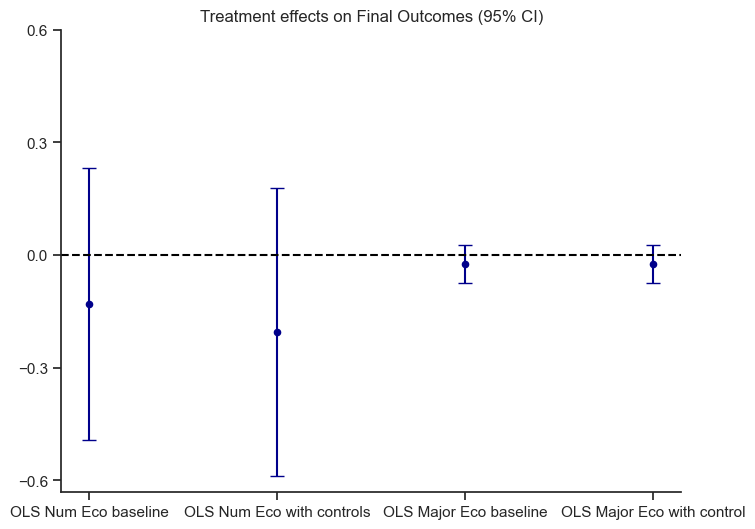

In [46]:
fig, ax = plt.subplots(figsize=(8, 6))

# scatter plot ( para los points . coeficciente)

ax.scatter(x=table_pandas['Model'], 
         marker='o', s=20,  # s: modificar tamaño del point
         y=table_pandas['Estimate'], color = "darkblue")

# errorbar para graficar el itervalo de confianza 

eb1 = plt.errorbar(x=table_pandas['Model'], y=table_pandas['Estimate'],
            yerr = 0.5*(table_pandas['Upper_bound']- table_pandas['Lower_bound']),
            color = 'darkblue', ls='', capsize = 5)

# yerr: distancia del punto (coeficeinte) a los extremo del intervalo (la mitad de la diferencia del upper vs lower bound)
# capsize: longitud de las barras del intervalo

# ls='': no une los puntos rojos 
#  yerr genera el gráfico del intervalo de confianza 

plt.axhline(y=0, color = 'black').set_linestyle('--')  # linea horizontal 
ax.set_yticks([-0.6,-0.3,0, 0.3,0.6])

# guardamos
plt.title('Treatment effects on Final Outcomes (95% CI)',fontsize=12)
plt.savefig(r"..\..\output\tables\Treatment effects on Final Outcomes.png", dpi=300, bbox_inches='tight')

# 2. Web scrapping

## Historial de elecciones en Venezuela (Web Scrapping estático)

Extraer tablas que registran los resultados electorales en Venezuela en el periodo 2000–2015. Una vez extraídas todas las tablas, usted debe juntarlas en 
una única base de datos. 

1. En primer lugar, importamos librerías a utilizar

In [47]:
import pandas as pd
import requests

Se intentó screppear de todas las maneras posibles con BeautifulSoup, pero la librería no pudo encontrar la tabla, así que se decidió buscar otra manera. A través del API que nos brinda la página de Venezuela360 (arriba de la tabla) podemos scrappear las tablas. 

2. Definimos el api que se encuentra en la página de Venezuela360 y establecemos parametros para el scrapping

In [48]:
api=  "https://venezuela360.org/server/rest/services/Hosted/Elecciones_2000_2015_vizJS/FeatureServer/0/query?outFields=*&where=1%3D1"
parametros = {
    "resultOffset": "0",
    "resultRecordCount": "10",
    "f": "json",
    "outFields": "*",
    "where": "1=1",
    "returnGeometry": "false",
    "inSR": "4326",
}

3. Se realiza una solicitud a la API en varias páginas y se guarda los datos en una lista de DataFrames "dfs". Para ello, se tiene que especificar que se haga scrapping de la fila 1 al 13.183, avanzando de 10 en 10 (por eso se selecciona del 0 al 13.184)

In [49]:
dfs = []
for parametros['resultOffset'] in range(0, 13184,10):
    data = requests.get(api, params=parametros).json()
    dfs.append(pd.DataFrame([f['attributes'] for f in data['features']]))

4. El código combina todos los DataFrames de la lista dfs en un solo DataFrame utilizando la función pd.concat() de la biblioteca pandas.

In [50]:
df = pd.concat(dfs).reset_index(drop=True)

5. Obtenemos y mostramos el número de filas y columnas en el DataFrame "df". Notamos que pudimos obtener todas las filas y columnas solicitadas. 

In [51]:
num_filas = df.shape[0]
num_columnas = df.shape[1]

print("Número de filas:", num_filas)
print("Número de columnas:", num_columnas)

Número de filas: 13183
Número de columnas: 100


6. Por último, mostramos la figura de todo el DataFrame "df" para comprobar

In [52]:
print(df)

       otros2001  ppt2012  ppt2010  ppt2015  otros2006  otros2007  ppt2013  \
0             35        0       16        0         13          0        0   
1             33        0       22        0          6          0        0   
2             43        0       27        0          3          0        0   
3             32        0       10        0          5          0        0   
4            108        0       50        0          8          0        0   
...          ...      ...      ...      ...        ...        ...      ...   
13178         96        0        2        0          0          0        0   
13179         68        0        5        0          1          0        0   
13180         53        0        2        0          1          0        0   
13181        122        0       12        0         11          0        0   
13182         99        0        6        0          3          0        0   

       otros2008  otros2009  votos2012  ...  oficialismo2015  o